In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from preprocess_util import pre_process_data, impute_vals

In [3]:
c_hhold_train = pd.read_csv("data/C_hhold_train.csv", index_col='id')
#c_test = pd.read_csv("data/C_hhold_test.csv", index_col='id')

In [4]:
c_hhold_train.head()

,GRGAYimk,DNnBfiSI,cNDTCUPU,GvTJUYOo,vmKoAlVH,LhUIIEHQ,DTNyjXJp,PNAiwXUz,ABnhybHK,yiuxBjHP,...,AJHrHUkH,PaEKIlvv,bFEsoTgJ,ihACfisf,obIQUcpS,lAvdypjD,ARWytYMz,eqJPmiPb,mmoCpqWS,country
id,,,,,,,,,,,,,,,,,,,,,
57211,RslOh,SuNUt,gJLrc,EPKkJ,qKiiE,7,XuMYE,-5,QqETe,umyco,...,laFxs,kBQRJ,qcUVH,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,52,C
62519,jPUAt,boDkI,gJLrc,EPKkJ,YXkKd,7,XuMYE,331,sEJgr,yYwlq,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,NwjRA,wnPqZ,100,C
11614,OpTiw,boDkI,vURog,EPKkJ,qKiiE,9,XuMYE,-1,sEJgr,umyco,...,laFxs,oUXSJ,eusFW,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,70,C
6470,RslOh,VgxgY,gJLrc,EPKkJ,YXkKd,9,zfhKi,-5,sEJgr,umyco,...,laFxs,kBQRJ,jqrBN,AmPtx,YXwVA,jSoky,NwjRA,wnPqZ,10,C
33558,IXFlv,VgxgY,kPTaD,EPKkJ,YXkKd,9,XuMYE,23,sEJgr,umyco,...,laFxs,kBQRJ,eusFW,AmPtx,LSPRW,jSoky,herus,wnPqZ,-5,C


In [5]:
c_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


In [6]:
c_filled = impute_vals(c_hhold_train)

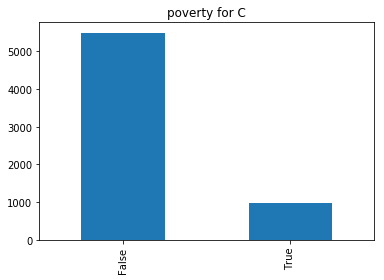

In [7]:
c_filled.poor.value_counts().plot.bar(title="poverty for C")

In [8]:
# get equal measure of 'false' and 'true' for validation set
c_true = c_filled[c_filled.poor == 1]
c_false = c_filled[c_filled.poor == 0]
print(c_true.shape)
c_false.shape

(973, 164)


(5496, 164)

In [9]:
true_ids = c_true.index.tolist()
false_ids = c_false.index.tolist()
c_val_true_ids = true_ids[:101]
c_train_true_ids = true_ids[101:]
c_val_false_ids = false_ids[:501]
c_train_false_ids = false_ids[501:]

In [10]:
c_filled_Y = c_filled.poor

In [11]:
c_filled_X = pre_process_data(c_filled.drop('poor', axis=1))

input shape	(6469, 163)
After standardization	(6469, 163)
After one hot encoding of categoricals	(6469, 795)


In [13]:
c_val_true_X = c_filled_X.loc[c_val_true_ids,:]
c_val_false_X = c_filled_X.loc[c_val_false_ids,:]
c_val_X = pd.concat([c_val_true_X, c_val_false_X])
print(c_val_X.shape)
c_val_X.head()

(602, 795)


,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,lAvdypjD_SnGME,lAvdypjD_UUKOE,lAvdypjD_gWylU,lAvdypjD_jSoky,ARWytYMz_NwjRA,ARWytYMz_herus,eqJPmiPb_Rrpos,eqJPmiPb_mORJu,eqJPmiPb_wnPqZ,country_C
id,,,,,,,,,,,,,,,,,,,,,
62519,-0.606739,3.907434,-0.313847,0.249445,-0.390493,0.524039,-3.296468,0.026222,-0.249567,-0.127064,...,0,0,0,1,1,0,0,0,1,1
11614,0.742520,-0.299653,0.449989,0.808967,1.004237,0.524039,0.380397,-0.444972,0.541055,-0.127064,...,0,0,0,1,1,0,0,0,1,1
47885,-0.606739,-0.299653,0.449989,-1.429121,1.004237,-2.809305,-0.144870,-2.329750,0.541055,-0.127064,...,0,0,0,1,0,1,1,0,0,1
33836,-0.606739,-0.248965,-0.313847,-0.310077,0.568384,0.524039,0.292852,0.497416,-0.249567,-0.127064,...,0,0,0,1,0,1,0,0,1,1
26240,-0.606739,-0.350340,-0.313847,0.808967,0.167399,0.524039,0.380397,-0.916167,-0.249567,-0.127064,...,0,0,0,1,1,0,0,0,1,1


In [14]:
c_val_true_Y = c_filled_Y.loc[c_val_true_ids]
c_val_false_Y = c_filled_Y.loc[c_val_false_ids]
c_val_Y = pd.concat([c_val_true_Y, c_val_false_Y])
print(c_val_Y.shape)
c_val_Y.tail()

(602,)


id
4071     False
75589    False
74737    False
19592    False
3517     False
Name: poor, dtype: bool

In [15]:
c_train_true_X = c_filled_X.loc[c_train_true_ids,:]
c_train_false_X = c_filled_X.loc[c_train_false_ids,:]
c_train_X = pd.concat([c_train_true_X, c_train_false_X])
print(c_train_X.shape)
c_train_X.head()

(5867, 795)


,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,lAvdypjD_SnGME,lAvdypjD_UUKOE,lAvdypjD_gWylU,lAvdypjD_jSoky,ARWytYMz_NwjRA,ARWytYMz_herus,eqJPmiPb_Rrpos,eqJPmiPb_mORJu,eqJPmiPb_wnPqZ,country_C
id,,,,,,,,,,,,,,,,,,,,,
30155,-0.606739,-0.350340,0.449989,0.808967,0.376608,-1.142633,0.336624,0.968611,-0.249567,-0.127064,...,0,0,0,1,0,1,0,0,1,1
34735,2.091779,-0.299653,-0.313847,1.368489,1.004237,-1.142633,0.380397,-1.387361,-0.249567,-0.127064,...,0,0,0,1,1,0,0,0,1,1
26723,-0.606739,0.004474,0.449989,0.808967,1.004237,0.524039,0.073991,0.026222,0.541055,-0.127064,...,0,0,0,1,0,1,0,1,0,1
52115,-0.606739,-0.350340,1.977661,0.249445,-0.059245,0.524039,0.249080,0.497416,2.122299,-0.127064,...,0,0,0,1,0,1,0,0,1,1
63821,-0.606739,1.626483,-0.313847,-0.310077,0.027926,0.524039,-1.326719,0.497416,-0.249567,0.184764,...,0,0,0,1,1,0,0,0,1,1


In [16]:
c_train_true_Y = c_filled_Y.loc[c_train_true_ids]
c_train_false_Y = c_filled_Y.loc[c_train_false_ids]
c_train_Y = pd.concat([c_train_true_Y, c_train_false_Y])
print(c_train_Y.shape)
c_train_Y.head()

(5867,)


id
30155    True
34735    True
26723    True
52115    True
63821    True
Name: poor, dtype: bool

In [17]:
cX_resampled, cY_resampled = SMOTE().fit_sample(c_train_X, c_train_Y)

In [18]:
print(Counter(cY_resampled).items())

dict_items([(True, 4995), (False, 4995)])


In [19]:
cX_resampled.shape

(9990, 795)

In [20]:
cX_resampled = cX_resampled.transpose()

In [21]:
cX_resampled.shape

(795, 9990)

In [22]:
cY_resampled.shape

(9990,)

In [24]:
cY_resampled = cY_resampled.reshape(1,9990)

In [25]:
cY_resampled.shape

(1, 9990)

In [26]:
cY_resampled = cY_resampled.astype(float)

In [27]:
c_val_X = c_val_X.transpose()
c_val_X.shape

(795, 602)

In [29]:
c_val_Y = c_val_Y.reshape(1, 602)
c_val_Y.shape

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(1, 602)

# BUILD MODEL

In [30]:
def initialize_parameters():
    '''inintialize the parameters for the 3 layer neural network'''
    W1 = tf.get_variable("W1", [30,795], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b1 = tf.get_variable("b1", [30,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [15,30], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b2 = tf.get_variable("b2", [15,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,15], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    return parameters

In [31]:
def predict(parameters, X):
    '''compute the forward pass of the neural network'''
    Z1 = tf.add(tf.matmul(parameters["W1"], X), parameters["b1"])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(parameters["W2"], Z1), parameters["b2"])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(parameters["W3"], Z2), parameters["b3"])
    
    return Z3

In [32]:
def make_placeholder(num_x, num_y):
    X = tf.placeholder('float', [num_x, None])
    Y = tf.placeholder('float', [num_y, None])
    
    return X, Y

In [33]:
def get_cost(Z3, Y):
    '''compute the cost function after an iteration'''
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [34]:
def fit(xtrain, ytrain, x_val, y_val, alpha=0.001, epochs=1000):
    '''function which does the training of the model'''
    
    tf.reset_default_graph()
    tf.set_random_seed(1)
    (num_x, m) = xtrain.shape
    num_y = ytrain.shape[0]
    costs = []
    
    X, Y = make_placeholder(num_x, num_y)
    
    parameters = initialize_parameters()
    
    z = predict(parameters, X)
    
    cost = get_cost(z, Y)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epochs):
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: xtrain, Y: ytrain})
            costs.append(temp_cost)
            
            if(epoch%100 == 0):
                print("At Epoch {0}, Cost is {1}".format(epoch, temp_cost))
        
        parameters = sess.run(parameters)
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(alpha))
        plt.show()

        # Calculate accuracy on the train set
        accuracy = get_cost(z, Y)

        print("Train Accuracy:", accuracy.eval({X: xtrain, Y: ytrain}))
        print("Validation Accuracy:", accuracy.eval({X: x_val, Y: y_val}))
        
        
        return parameters

In [35]:
def predict_final(parameters, X):
    '''compute the class probability of the neural network given the trained model params'''
    num_xtest = X.shape[0]
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    x_test = tf.placeholder('float', [num_xtest, None])
    Z = predict(params, x_test)
    A = tf.nn.sigmoid(Z)
    
    with tf.Session() as sess:
        predictions = sess.run(A, feed_dict={x_test:X})
    return predictions

In [36]:
import tensorflow as tf

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [37]:
import math

At Epoch 0, Cost is 0.7232839465141296
At Epoch 100, Cost is 0.6045329570770264
At Epoch 200, Cost is 0.5488919019699097
At Epoch 300, Cost is 0.5123226642608643
At Epoch 400, Cost is 0.4854542016983032
At Epoch 500, Cost is 0.46425846219062805
At Epoch 600, Cost is 0.44677773118019104
At Epoch 700, Cost is 0.43195217847824097
At Epoch 800, Cost is 0.41914936900138855
At Epoch 900, Cost is 0.40795862674713135


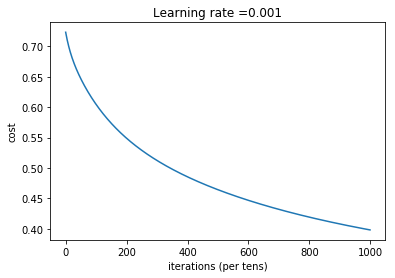

Train Accuracy: 0.39809054
Validation Accuracy: 0.40317273


In [38]:
pred_params = fit(cX_resampled, cY_resampled, c_val_X, c_val_Y, epochs=1000)

In [39]:
c_test = pd.read_csv("data/C_hhold_test.csv", index_col='id')

In [40]:
c_test = impute_vals(c_test)

In [41]:
c_test = c_test.fillna(0)

In [42]:
c_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3187 entries, 6211 to 98377
Columns: 163 entries, GRGAYimk to country
dtypes: float64(1), int64(29), object(133)
memory usage: 4.0+ MB


In [43]:
c_filled_X.columns

Index(['LhUIIEHQ', 'PNAiwXUz', 'jmsRIiqp', 'NONtAKOM', 'kLAQgdly', 'WWuPOkor',
       'CtFxPQPT', 'GIwNbAsH', 'qLDzvjiU', 'detlNNFh',
       ...
       'lAvdypjD_SnGME', 'lAvdypjD_UUKOE', 'lAvdypjD_gWylU', 'lAvdypjD_jSoky',
       'ARWytYMz_NwjRA', 'ARWytYMz_herus', 'eqJPmiPb_Rrpos', 'eqJPmiPb_mORJu',
       'eqJPmiPb_wnPqZ', 'country_C'],
      dtype='object', length=795)

In [44]:
c_hhold_train.columns

Index(['GRGAYimk', 'DNnBfiSI', 'cNDTCUPU', 'GvTJUYOo', 'vmKoAlVH', 'LhUIIEHQ',
       'DTNyjXJp', 'PNAiwXUz', 'ABnhybHK', 'yiuxBjHP',
       ...
       'AJHrHUkH', 'PaEKIlvv', 'bFEsoTgJ', 'ihACfisf', 'obIQUcpS', 'lAvdypjD',
       'ARWytYMz', 'eqJPmiPb', 'mmoCpqWS', 'country'],
      dtype='object', length=164)

In [45]:
c_test = pre_process_data(c_test, enforce_cols=c_filled_X.columns)

input shape	(3187, 163)
After standardization	(3187, 163)
After one hot encoding of categoricals	(3187, 773)


In [46]:
c_test.head()

,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,gZWEypOM_iqxdn,ihACfisf_hBRam,kZmWbEDL_dakhN,kdkPWxwS_Qicsw,nomHWXYi_Dadfh,nuMtebks_LHhnr,nuMtebks_hZFmB,qCEuAGDU_qQxrL,qbMphwEx_ppCPk,ueeRzZmV_nwsfJ
id,,,,,,,,,,,,,,,,,,,,,
6211,0.756899,-0.420743,-0.342818,0.819147,1.065812,0.523759,0.301324,0.007565,-0.279542,-0.123344,...,0,0,0,0,0,0,0,0,0,0
77549,0.756899,1.127713,0.426050,0.819147,-1.013694,0.523759,-9.012596,0.007565,0.525974,-0.123344,...,0,0,0,0,0,0,0,0,0,0
34834,-0.612912,-0.313953,0.426050,0.819147,1.065812,0.523759,0.260293,0.972001,0.525974,-0.123344,...,0,0,0,0,0,0,0,0,0,0
74650,-0.612912,-0.207163,-0.342818,0.819147,0.230296,0.523759,-1.216804,0.972001,-0.279542,1.085258,...,0,0,0,0,0,0,0,0,0,0
65375,0.756899,-0.313953,0.426050,0.819147,0.026059,0.523759,0.342354,0.489783,0.525974,-0.123344,...,0,0,0,0,0,0,0,0,0,0


In [47]:
c_test = c_test.transpose()
c_test.head()

id,6211,77549,34834,74650,65375,68425,6142,95572,73658,31069,...,63899,72790,1588,254,68171,6775,88300,35424,81668,98377
LhUIIEHQ,0.756899,0.756899,-0.612912,-0.612912,0.756899,0.756899,-0.612912,-0.612912,-0.612912,-0.612912,...,-0.612912,0.756899,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912,-0.612912
PNAiwXUz,-0.420743,1.127713,-0.313953,-0.207163,-0.313953,0.807342,-0.313953,-0.367348,-0.313953,-0.367348,...,-0.367348,-0.260558,-0.420743,2.515983,6.040056,-0.367348,-0.367348,2.996539,7.588512,2.515983
jmsRIiqp,-0.342818,0.426050,0.426050,-0.342818,0.426050,0.426050,-0.342818,0.426050,-0.342818,-0.342818,...,-0.342818,-0.342818,0.426050,-1.111687,-0.342818,-0.342818,-0.342818,0.426050,-1.111687,-1.111687
NONtAKOM,0.819147,0.819147,0.819147,0.819147,0.819147,0.819147,-0.267706,-0.267706,-0.267706,0.819147,...,-0.811133,0.275720,-0.267706,0.819147,0.819147,0.819147,1.362573,0.819147,0.819147,-0.811133
kLAQgdly,1.065812,-1.013694,1.065812,0.230296,0.026059,-0.605220,0.323131,-0.716622,-0.493817,1.065812,...,1.065812,0.285997,0.137461,0.193162,0.323131,1.065812,0.230296,-2.053447,0.230296,1.065812


In [48]:
c_pred = predict_final(pred_params, c_test)

In [49]:
c_pred = c_pred.T

In [50]:
c_pred.mean()

0.528655

In [51]:
ctest_cols = c_test.columns.tolist()
#c_pred.shape
#c = pd.DataFrame({'id': c_test.columns,
 #                'poor': c_pred})

In [52]:
c = pd.DataFrame(data={'id': ctest_cols,'poor': c_pred.flatten()})
c.set_index('id', inplace=True)
c.head()

,poor
id,
6211,0.630819
77549,0.224555
34834,0.585799
74650,0.491629
65375,0.360986


In [126]:
#c.to_csv('c_test.csv')

In [53]:
c

,poor
id,
6211,0.630819
77549,0.224555
34834,0.585799
74650,0.491629
65375,0.360986
68425,0.675000
6142,0.305985
95572,0.433855
73658,0.284366


In [56]:
c['country'] = 'C'
c = c[['country', 'poor']]

In [57]:
c

,country,poor
id,,
6211,C,0.630819
77549,C,0.224555
34834,C,0.585799
74650,C,0.491629
65375,C,0.360986
68425,C,0.675000
6142,C,0.305985
95572,C,0.433855
73658,C,0.284366


In [58]:
c.to_csv('C2.csv')